# **PCVK WEEK 11 - Edge Detection**
- Naresh Pratista
- 2141720057
- TI-3H

In [39]:
# Import Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### **Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.**

In [4]:
# load citra input
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

In [5]:
#load citra template
template = cv.imread('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

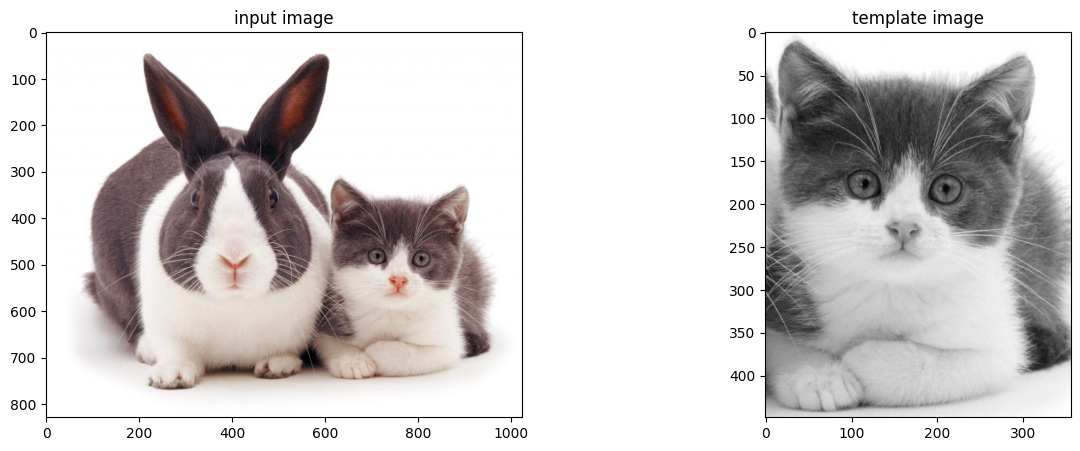

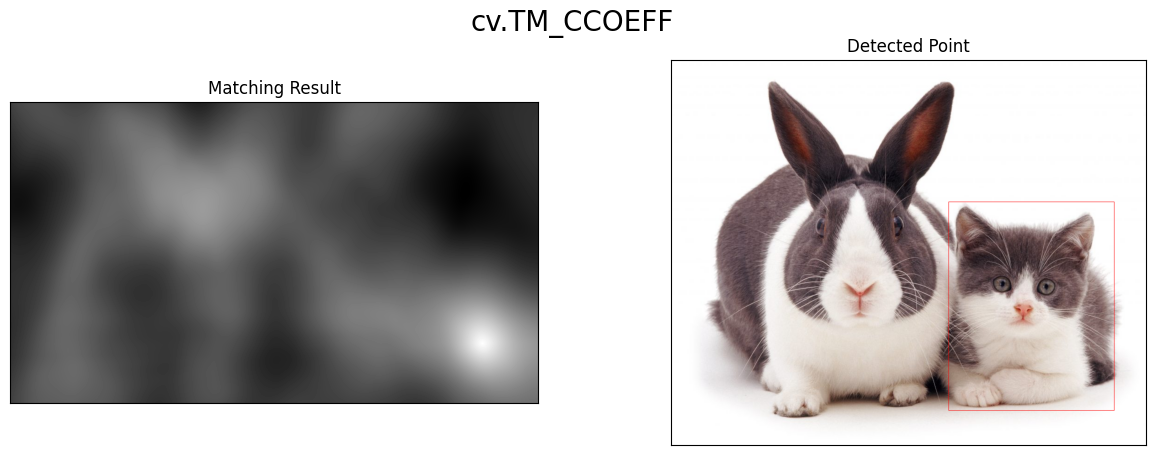

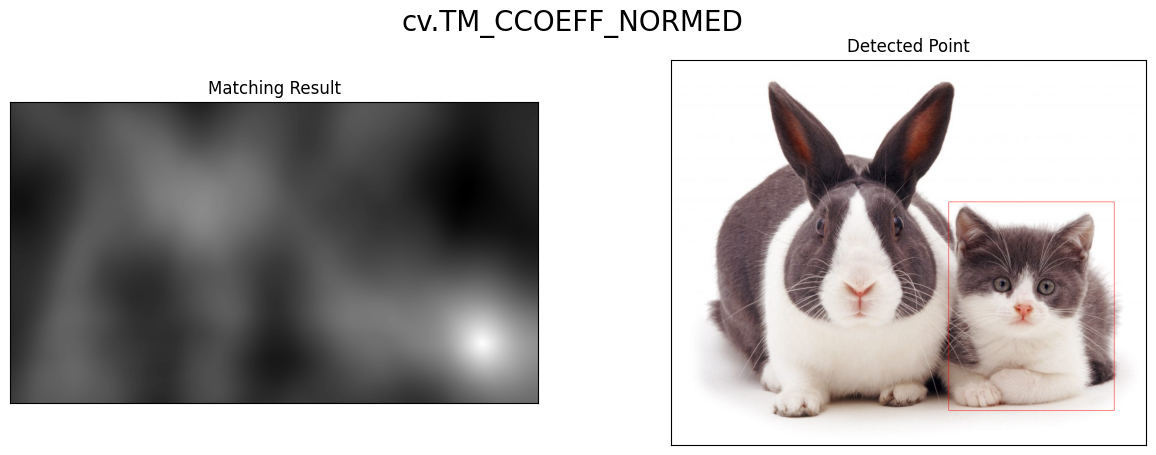

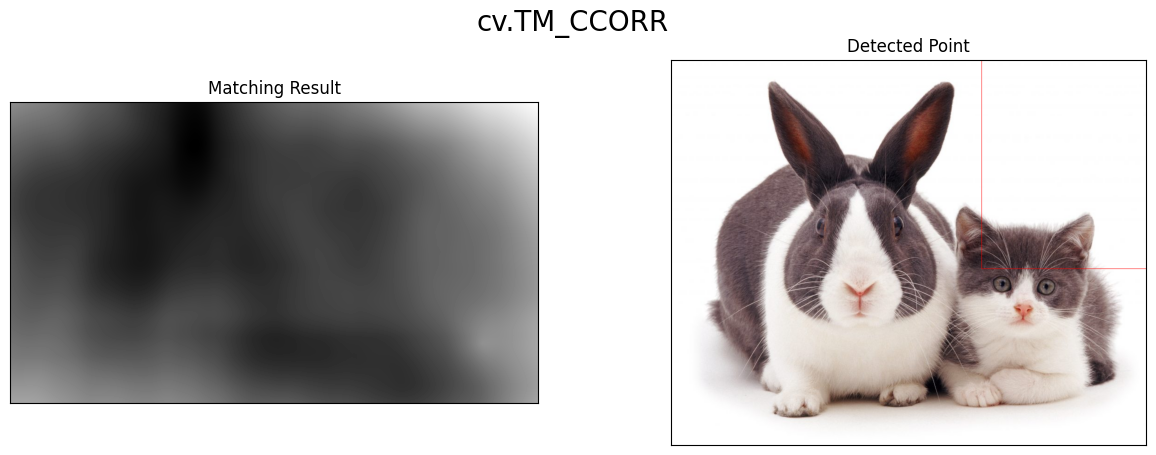

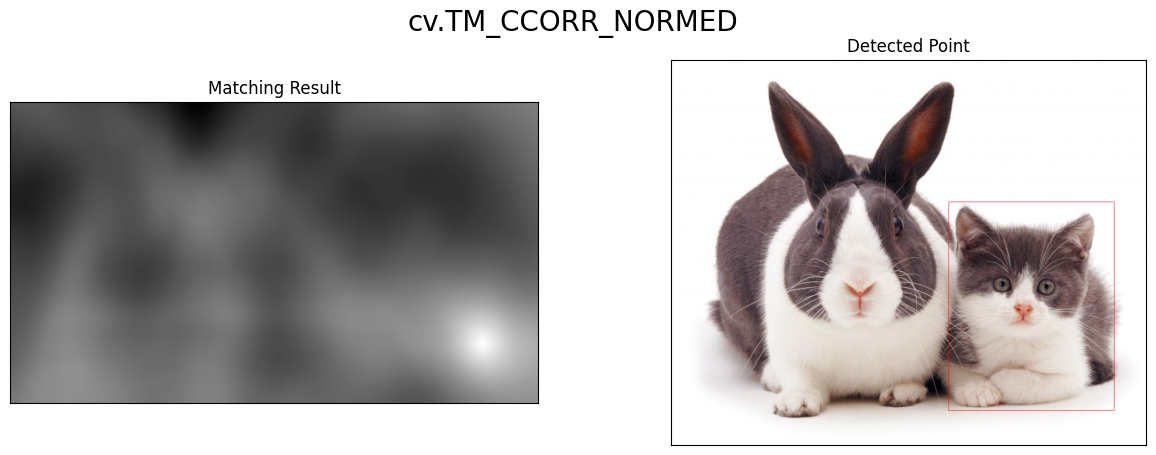

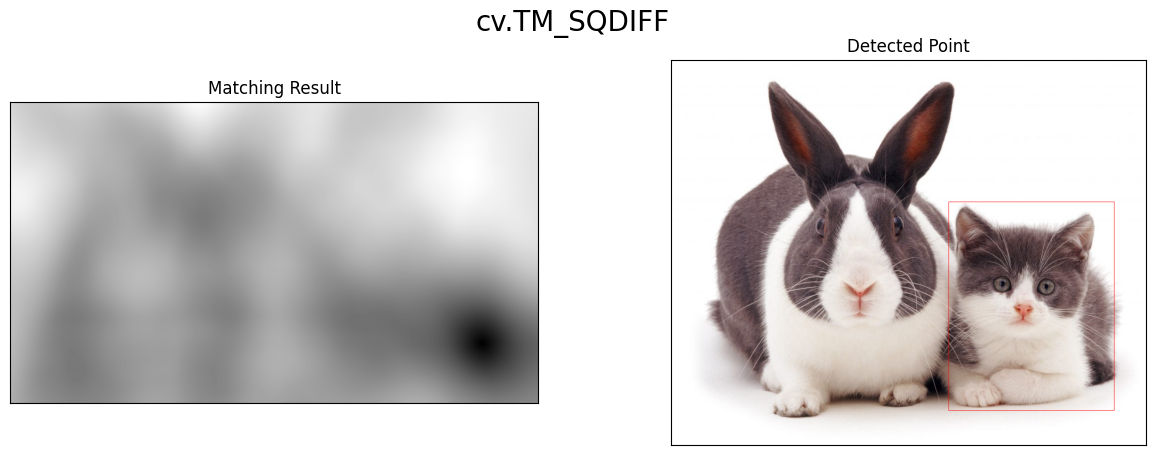

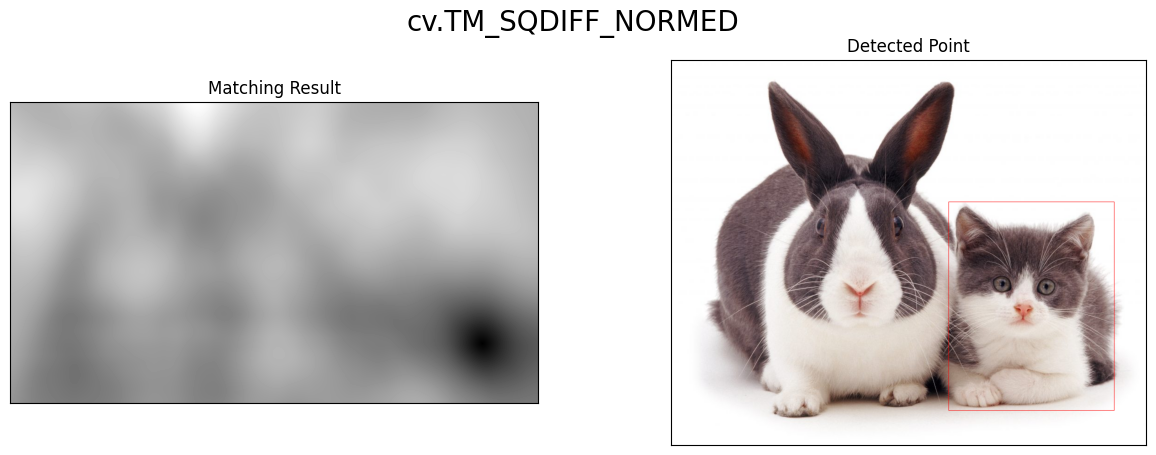

In [7]:
# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

### **Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template,**

In [8]:
from PIL import Image

def normalize(arr):
    return (arr - arr.mean()) / (arr.std() * len(arr))

In [9]:
# Load images
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/bahrain.jpg')
template = Image.open('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/bahrain-template.jpg')

In [11]:
# Convert citra menjadi grayscale
img_gray = img.convert('L')
template_gray = template.convert('L')

# Convert citra menjadi NumPy arrays
img_array = np.array(img_gray)
template_array = np.array(template_gray)

In [12]:
# Normalize the arrays
img_norm = normalize(img_array)
template_norm = normalize(template_array)

In [14]:
# Perform cross-correlation
correlation = np.zeros((img_array.shape[0] - template_array.shape[0], img_array.shape[1] - template_array.shape[1]))

for y in range(correlation.shape[0]):
    for x in range(correlation.shape[1]):
        roi = img_norm[y:y + template_array.shape[0], x:x + template_array.shape[1]]
        correlation[y, x] = np.sum(roi * template_norm)

In [15]:
# Find the location of the maximum correlation
y, x = np.unravel_index(np.argmax(correlation), correlation.shape)

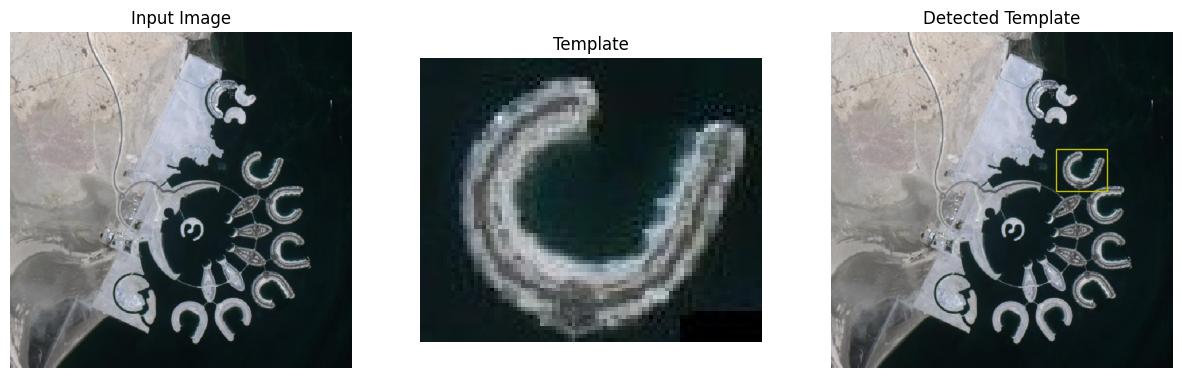

In [16]:
# Tampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Input Image')
ax[0].axis('off')

ax[1].imshow(template)
ax[1].set_title('Template')
ax[1].axis('off')

ax[2].imshow(img)
rect = plt.Rectangle((x, y), template_array.shape[1], template_array.shape[0], edgecolor='y', facecolor='none')
ax[2].add_patch(rect)
ax[2].set_title('Detected Template')
ax[2].axis('off')

plt.show()

### **Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg,**

In [17]:
from cv2.gapi import Laplacian

In [20]:
# Load Gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/car-park.jpg')

In [23]:
# Convert menjadi grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [24]:
# Sobel Edge Detection
sobel_x = cv.Sobel(gray_image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(gray_image, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny = cv.Canny(gray_image, 50, 150)

# Laplacian Edge Detection
laplacian = cv.Laplacian(gray_image, cv.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian))

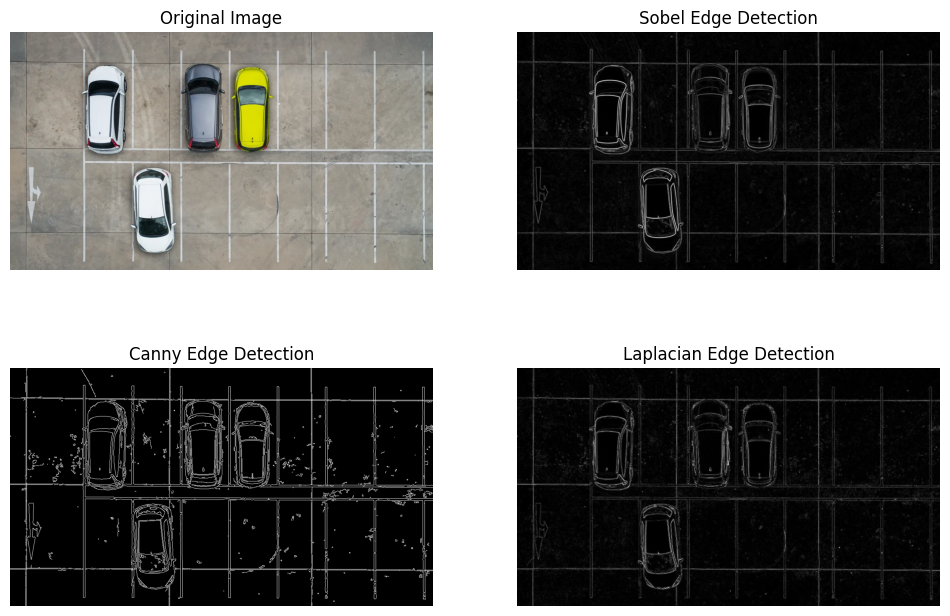

<Figure size 640x480 with 0 Axes>

In [25]:
# Tampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(222), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(223), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(224), plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

### **Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg**

In [28]:
# Load Gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/chess-board.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

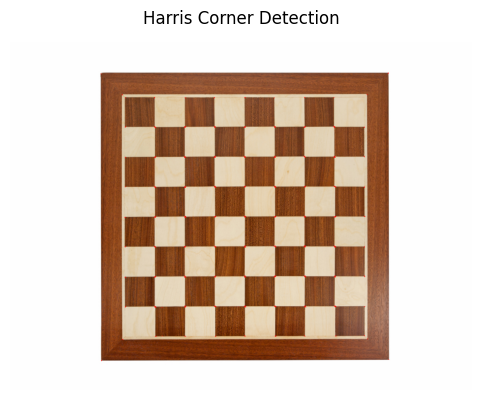

In [29]:
# Deteksi sudut menggunakan metode Harris
corner_harris = cv.cornerHarris(gray, 2, 3, 0.04)

# Ambil nilai sudut yang cukup besar (threshold)
threshold = 0.01 * corner_harris.max()
image[corner_harris > threshold] = [0, 0, 255]  # Ubah sudut yang dideteksi menjadi warna merah

# Tampilkan hasil Harris Corner Detection
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

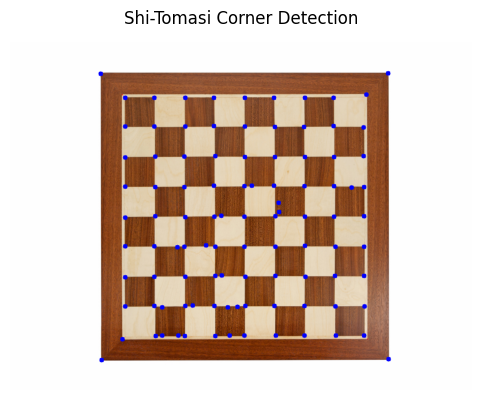

In [30]:
# Deteksi sudut menggunakan metode Shi-Tomasi
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

# Gambar sudut pada gambar
for corner in corners:
    x, y = corner.ravel()
    cv.circle(image, (x, y), 5, 255, -1)

# Tampilkan hasil Shi-Tomasi Corner Detection
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

### **Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg.Tahapan proses grid detection sesuai yang terdapat pada ulasan teori,**

In [31]:
# Load Gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/sudoku.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [32]:
edges = cv.Canny (gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(image, (x1, y1), (x2,y2),(0,0,255),2)


number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


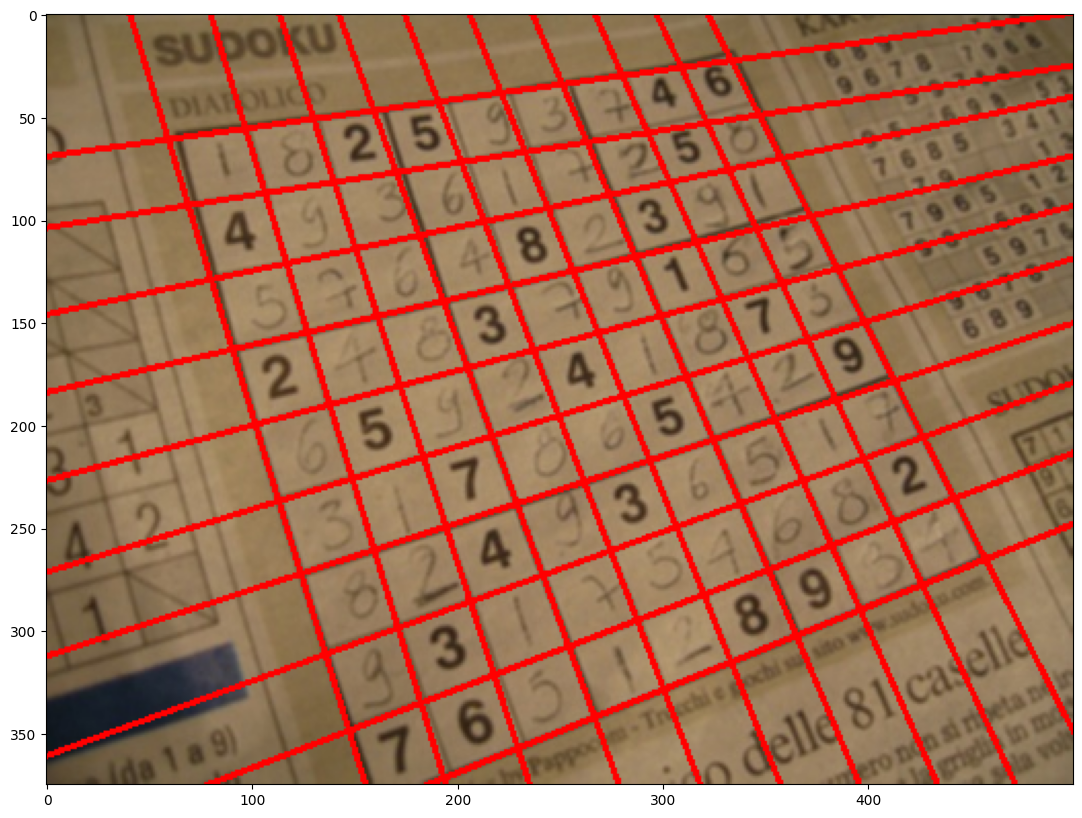

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

### **Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg**

In [34]:
# Load Gambar
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Pcvk/Object Detection/laptop.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

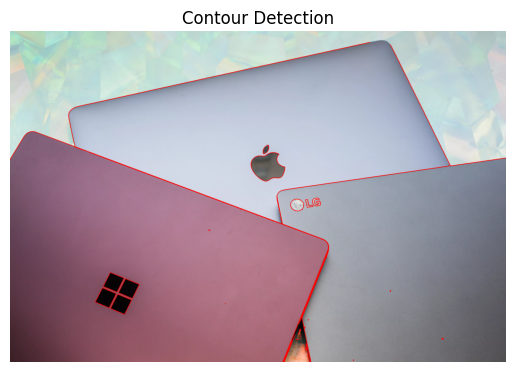

In [35]:
# Terapkan Gaussian Blur untuk mengurangi noise
edged = cv.Canny(gray, 30, 200)

# Cari kontur menggunakan findContours
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Gambar kontur pada gambar asli
cv.drawContours(image, contours, -1, (0, 0, 255), 3)

# Tampilkan hasil deteksi kontur
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')
plt.show()

## **Pengayaan Materi KTP**

**1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban**

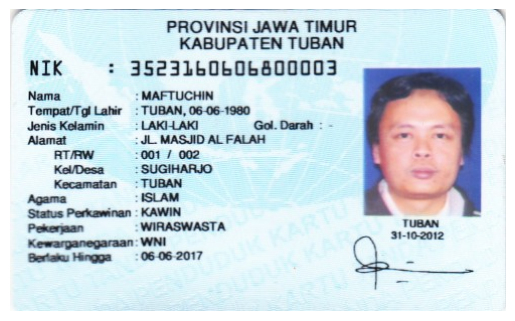

In [61]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/week7/KTP_More/ktp3.png')

plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

**2. Muat 2 library berikut sebagai tahapan persiapan**

In [62]:
import cv2 as cv
import os

**3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut**

In [63]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/Colab Notebooks/week7/KTP_More"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

AttributeError: ignored